In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt #allows us to plot our results if desired


# GWC@VT: Intro to Neural Networks
In this notebook, we'll explore neural networks for a classification machine learning problem, using the famous Iris dataset.

## Data Preparation

In [4]:
#with sklearn datasets, we can go ahead and import the data
#as a label (3 iris classes) and features (4 features)
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
#next, we'll need to one-hot encode our label, since we're working with categorial data
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

Now that our data is ready, let's split it into our training and test data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42, stratify=y)


In [8]:
#let's also scale our X features.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Constructing our Model
Now it's time to start building the pieces of our model! Unlike some of the simpler models, we'll actually build the model, its layers, and its optimization and loss functions separately, then compile them together.




In [20]:
#1. create model object
model = tf.keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)), #4 input features
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax') #our output layer-- uses softmax to categorize
])

In [21]:
#compile all our features together!
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


## Training our Model
Now, we can train the model with model.fit

In [22]:
num_epochs = 10

In [23]:
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.6777 - loss: 0.9886 - val_accuracy: 0.3333 - val_loss: 1.3270
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7685 - loss: 0.9032 - val_accuracy: 0.3333 - val_loss: 1.6175
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8327 - loss: 0.8030 - val_accuracy: 0.3333 - val_loss: 1.9322
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7923 - loss: 0.7600 - val_accuracy: 0.3333 - val_loss: 2.2761
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8217 - loss: 0.6603 - val_accuracy: 0.3333 - val_loss: 2.6699
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8363 - loss: 0.6251 - val_accuracy: 0.3333 - val_loss: 3.0184
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8269 - loss: 0.5741 - val_accuracy: 0.3333 - val_loss: 3.3364
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8137 - loss: 0.5421 - val_accuracy: 0.3333 - val_loss: 3.6016

# Evaluating our Model
Now, let's see how our model did!

In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Validation Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3333 - loss: 3.8780
Validation Accuracy: 0.3333


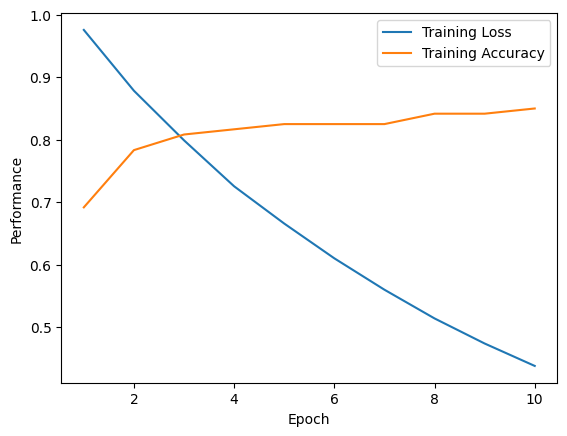

In [25]:
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()